In [45]:
from keras.datasets import mnist # 손글씨
from keras.utils import np_utils # one hot encoding
import numpy
import sys
import tensorflow as tf

In [46]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [47]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [48]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


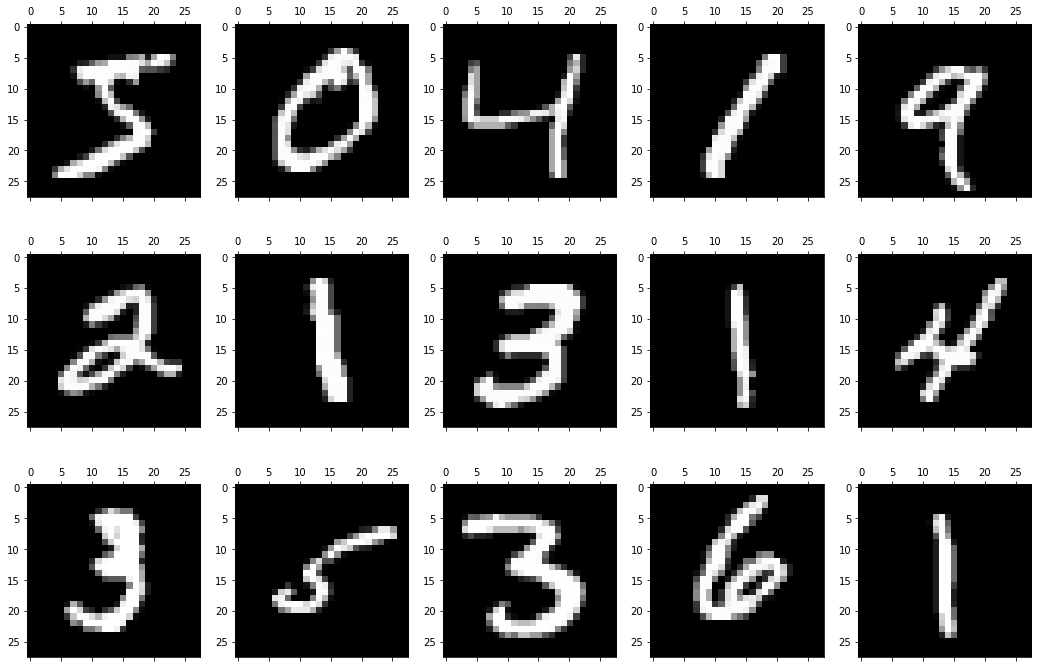

In [49]:
figure,axes = plt.subplots(nrows=3,ncols=5)
figure.set_size_inches(18,12)

plt.gray()
print("label={}".format(y_train[0:15]))

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].matshow(X_train[col])
    axes[row][1].matshow(X_train[col+1])
    axes[row][2].matshow(X_train[col+2])
    axes[row][3].matshow(X_train[col+3])
    axes[row][4].matshow(X_train[col+4])

In [50]:
print(X_train.shape)  # 60000 만개, 28행, 28열
X_train[0].shape

(60000, 28, 28)


(28, 28)

In [51]:
X_train = X_train.reshape(X_train.shape[0],784)   # 60000, 28, 28 -> 60000, 784로 변경 1차로만듬 들어가는
#층이 일렬로 되어있어서 1차로 만드는것이다. 
X_train.astype('float64')  
X_train = X_train/255    # 데이터 값의 범위 0~255 -> 0~1 
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
import numpy as np

In [33]:
print(X_train.shape)               # 데이터 크기
np.min(X_train), np.max(X_train)  

(60000, 784)


(0.0, 1.0)

In [67]:
# 테스트 데이터 전처리
X_test = X_test.reshape(X_test.shape[0],784)
X_test.astype('float64')
X_test = X_test/255

In [68]:
print(X_test.shape)               # 데이터 크기
np.min(X_test), np.max(X_test)   # 값의 범위

(10000, 784)


(0.0, 1.0)

In [69]:
print(y_train.shape) # 60000, 1차원데이터

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train.shape) # 60000,10 2차원데이터 신경망에 적용하기위해서 2차원데이터로 변경해주었다. (예측한값과 실제값을 비교하기위해서)
# 이항은 binary cross entropy 다항은 categorical cross entropy

(60000,)
(60000, 10)


In [70]:
### input_dim = 784
### 첫번째 은닉층 512개 노드, 활성화 함수는 relu
### 두번째 은닉층 128개 노드, 활성화 함수는 relu
### 세번째 출력층 10개의 노드, 활성화 함수는 softmax
from keras.models import Sequential
from keras.layers import Dense
m = Sequential()
m.add(Dense(512,input_dim=784,activation='relu'))
m.add(Dense(128,activation='relu'))
m.add(Dense(10,activation='softmax'))

In [71]:
### 오차함수(비용함수), 최적화 함수()
m.compile(loss='categorical_crossentropy',optimizer='adam',
         metrics=['accuracy'])

In [72]:
history = m.fit(X_train,Y_train,validation_data=(X_test,Y_test),
               epochs=30,
               batch_size=200
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.2675 - accuracy: 0.9238 - val_loss: 0.1325 - val_accuracy: 0.9610
Epoch 2/30
60000/60000 [==============================] - 4s 63us/step - loss: 0.0984 - accuracy: 0.9703 - val_loss: 0.0861 - val_accuracy: 0.9728
Epoch 3/30
60000/60000 [==============================] - 5s 80us/step - loss: 0.0624 - accuracy: 0.9814 - val_loss: 0.0761 - val_accuracy: 0.9757
Epoch 4/30
60000/60000 [==============================] - 6s 97us/step - loss: 0.0431 - accuracy: 0.9871 - val_loss: 0.0664 - val_accuracy: 0.9798
Epoch 5/30
60000/60000 [==============================] - 6s 102us/step - loss: 0.0323 - accuracy: 0.9902 - val_loss: 0.0657 - val_accuracy: 0.9810
Epoch 6/30
60000/60000 [==============================] - 6s 107us/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0616 - val_accuracy: 0.9815
Epoch 7/30
60000/60000 [==============================] - 7s 109us

In [73]:
pred = m.predict(X_test)
pred.shape

(10000, 10)

In [74]:
pred[0]

array([2.1883740e-12, 2.5557396e-14, 5.9493121e-15, 6.1609450e-14,
       1.3408066e-20, 1.5975984e-16, 3.3132425e-19, 1.0000000e+00,
       1.5694557e-16, 2.1086191e-14], dtype=float32)

In [75]:
import numpy as np

In [76]:
np.argmax(pred[0])

7

In [77]:
m.evaluate(X_test,Y_test)[1]

10000/10000 [==============================] - 0s 39us/step


0.9854999780654907

In [ ]:
### epochs와 batch_size 또는 은닉층의 수를 조정해 가며 결과를 확인해 보자
# epochs 수 늘리기
# 배치 사이즈는 적게 하는게 정확도가 올라감
# 은닉층의 노드수 조정해 가면서 결과 확인

In [96]:
b = Sequential()

In [97]:
b.add(Dense(128,activation='relu',input_dim=784))
b.add(Dense(24,activation='relu'))
b.add(Dense(10,activation='softmax'))

In [98]:
b.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [99]:
history2 = b.fit(X_train,Y_train,validation_data=[X_test,Y_test],
                epochs=30,
                batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 32us/step - loss: 0.4650 - accuracy: 0.8672 - val_loss: 0.2185 - val_accuracy: 0.9379
Epoch 2/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.1837 - accuracy: 0.9466 - val_loss: 0.1641 - val_accuracy: 0.9513
Epoch 3/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.1317 - accuracy: 0.9613 - val_loss: 0.1218 - val_accuracy: 0.9628
Epoch 4/30
60000/60000 [==============================] - 2s 36us/step - loss: 0.1029 - accuracy: 0.9695 - val_loss: 0.1036 - val_accuracy: 0.9696
Epoch 5/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.0816 - accuracy: 0.9763 - val_loss: 0.0933 - val_accuracy: 0.9726
Epoch 6/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.0678 - accuracy: 0.9800 - val_loss: 0.0910 - val_accuracy: 0.9722
Epoch 7/30
60000/60000 [==============================] - 2s 36us/st

In [100]:
pred = b.predict(X_test)
pred.shape

(10000, 10)

In [101]:
pred[0]

array([9.13112901e-14, 2.95983637e-12, 7.06416836e-09, 1.52078670e-07,
       2.84913534e-16, 3.91510435e-10, 1.30855514e-17, 9.99999881e-01,
       4.53456959e-11, 1.47290780e-09], dtype=float32)

In [102]:
np.argmax(pred[0])

7

In [103]:
c = Sequential()

In [104]:
c.add(Dense(512,activation='relu',input_dim=784))
c.add(Dense(128,activation='relu'))
c.add(Dense(10,activation='softmax'))

In [105]:
c.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [106]:
history3 = c.fit(X_train,Y_train,validation_data=[X_test,Y_test],
                epochs=100,
                batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 70us/step - loss: 0.2693 - accuracy: 0.9209 - val_loss: 0.1189 - val_accuracy: 0.9630
Epoch 2/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.0975 - accuracy: 0.9705 - val_loss: 0.0904 - val_accuracy: 0.9703
Epoch 3/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0627 - accuracy: 0.9806 - val_loss: 0.0717 - val_accuracy: 0.9781
Epoch 4/100
60000/60000 [==============================] - 7s 115us/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0688 - val_accuracy: 0.9793
Epoch 5/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.0312 - accuracy: 0.9904 - val_loss: 0.0718 - val_accuracy: 0.9763
Epoch 6/100
60000/60000 [==============================] - 8s 132us/step - loss: 0.0232 - accuracy: 0.9931 - val_loss: 0.0706 - val_accuracy: 0.9799
Epoch 7/100
60000/60000 [==============================] -

60000/60000 [==============================] - 9s 146us/step - loss: 1.8846e-06 - accuracy: 1.0000 - val_loss: 0.1134 - val_accuracy: 0.9853
Epoch 55/100
60000/60000 [==============================] - 9s 145us/step - loss: 1.6207e-06 - accuracy: 1.0000 - val_loss: 0.1145 - val_accuracy: 0.9855
Epoch 56/100
60000/60000 [==============================] - 9s 158us/step - loss: 1.3923e-06 - accuracy: 1.0000 - val_loss: 0.1154 - val_accuracy: 0.9855
Epoch 57/100
60000/60000 [==============================] - 11s 185us/step - loss: 1.2089e-06 - accuracy: 1.0000 - val_loss: 0.1164 - val_accuracy: 0.9853
Epoch 58/100
60000/60000 [==============================] - 8s 141us/step - loss: 1.0452e-06 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9858
Epoch 59/100
60000/60000 [==============================] - 9s 157us/step - loss: 8.9635e-07 - accuracy: 1.0000 - val_loss: 0.1187 - val_accuracy: 0.9856
Epoch 60/100
60000/60000 [==============================] - 9s 143us/step - loss: 7.8318

In [107]:
c = Sequential()

In [108]:
c.add(Dense(512,activation='relu',input_dim=784))
c.add(Dense(128,activation='relu'))
c.add(Dense(10,activation='softmax'))

In [109]:
c.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
%%time
history3 = c.fit(X_train,Y_train,validation_data=[X_test,Y_test],
                epochs=30,
                batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 373us/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 0.0857 - val_accuracy: 0.9798
Epoch 2/30
60000/60000 [==============================] - 24s 398us/step - loss: 0.0166 - accuracy: 0.9941 - val_loss: 0.1012 - val_accuracy: 0.9773
Epoch 3/30
60000/60000 [==============================] - 24s 394us/step - loss: 0.0145 - accuracy: 0.9953 - val_loss: 0.0828 - val_accuracy: 0.9811
Epoch 4/30
60000/60000 [==============================] - 24s 397us/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.0825 - val_accuracy: 0.9797
Epoch 5/30
60000/60000 [==============================] - 25s 418us/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0963 - val_accuracy: 0.9786
Epoch 6/30
60000/60000 [==============================] - 24s 396us/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.0919 - val_accuracy: 0.9809
Epoch 7/30
60000/60000 [==============================] 